<a href="https://colab.research.google.com/github/imeunu/Capstone_PBL/blob/main/Speaker_Verification_MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이번 모델에서는 MFCC로 했을 때의 정확도를 알아보려고 했습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf

In [ ]:
mfcc_folder_path= '/content/drive/MyDrive/화자인식/Preprocessed_mfcc'
list_word_folder= os.listdir(mfcc_folder_path)
list_word_folder

['sheila',
 'six',
 'up',
 'two',
 'three',
 'stop',
 'wow',
 'zero',
 'tree',
 'yes',
 'no',
 'on',
 'marvin',
 'one',
 'left',
 'right',
 'off',
 'nine',
 'seven',
 'house',
 'eight',
 'dog',
 'bed',
 'happy',
 'five',
 'go',
 'bird',
 'four',
 'down',
 'cat']

In [ ]:
X= []
Y= []
ver_speaker='0b77ee66' # 임의의 화자
for word in list_word_folder:
  word_dir= mfcc_folder_path+'/'+word
  list_csv= os.listdir(word_dir)
  for file in list_csv:
    csv_dir= word_dir+'/'+file
    data= np.genfromtxt(csv_dir, delimiter=',', dtype= float)
    X.append(data)
    if file.split('_')[2]==ver_speaker:
      Y.append(0)
    else:
      Y.append(1)


In [ ]:
X= np.asarray(X)
X.shape

(263, 196, 14)

In [ ]:
print(Y[:5])
Y= np.asarray(Y)
Y.shape

[1, 1, 1, 1, 1]


(263,)

In [ ]:
from sklearn.model_selection import train_test_split
## 0.6: 0.2: 0.2 로 분리
## Stratifiy를 이용해서 데이터 불균형 해소
X_train, X_save, y_train, y_save= train_test_split(X, Y, test_size= 0.4, stratify= Y)
X_test, X_val, y_test, y_val= train_test_split(X_save, y_save, test_size= 0.5, stratify= y_save)

X_train= np.asarray(X_train)
X_val= np.asarray(X_val)
X_test=np.asarray(X_test)
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(157, 196, 14) (53, 196, 14) (53, 196, 14)
(157,) (53,) (53,)


In [ ]:
## 차원 확장
X_train= np.expand_dims(X_train, -1)
X_val= np.expand_dims(X_val, -1)
X_test= np.expand_dims(X_test, -1)

In [ ]:
print(X_train.shape, X_val.shape)

(157, 196, 14, 1) (53, 196, 14, 1)


In [ ]:
from keras import models
from keras import layers
import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


model = models.Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(196, 14, 1)))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping

# callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    callbacks=[es],
                    epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 224ms/step - loss: 3.1371 - accuracy: 0.6191 - val_loss: 0.3859 - val_accuracy: 0.8868
Epoch 2/100
5/5 [==============================] - 1s 130ms/step - loss: 0.4337 - accuracy: 0.8784 - val_loss: 0.3433 - val_accuracy: 0.8868
Epoch 3/100
5/5 [==============================] - 1s 127ms/step - loss: 0.3579 - accuracy: 0.8967 - val_loss: 0.3133 - val_accuracy: 0.8868
Epoch 4/100
5/5 [==============================] - 1s 127ms/step - loss: 0.3496 - accuracy: 0.9075 - val_loss: 0.3053 - val_accuracy: 0.8868
Epoch 5/100
5/5 [==============================] - 1s 127ms/step - loss: 0.2913 - accuracy: 0.9153 - val_loss: 0.2992 - val_accuracy: 0.8868
Epoch 6/100
5/5 [==============================] - 1s 125ms/step - loss: 0.3036 - accuracy: 0.8884 - val_loss: 0.2984 - val_accuracy: 0.8868
Epoch 7/100
5/5 [==============================] - 1s 125ms/step - loss: 0.2968 - accuracy: 0.8871 - val_loss: 0.2720 - val_accuracy: 0.8868
Epoch 8/100
5

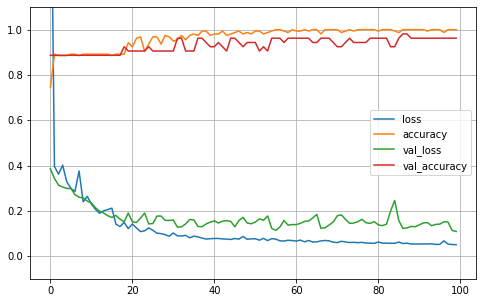

In [ ]:
# 학습과정 시각화
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

In [ ]:
## test set에다가 평가
test_loss, test_mae= model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 23ms/step - loss: 0.0614 - accuracy: 0.9811


In [ ]:
test_prediction= model.predict(X_test)
test_prediction

In [ ]:
y_pred=[]
for i in test_prediction:
  if i[0]>i[1]:
    y_pred.append(0)
  else:
    y_pred.append(1)

y_pred

In [ ]:
y_test

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1])

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 5,  1],
       [ 0, 47]])

## FAR로 Evaluation

In [ ]:
far= 1/48*100
print('FAR={:.4}%'.format(far)) 

FAR=2.083%
